Lab 5

Name: Wayne Lai

This Lab took about 8 hours, not including the time troubleshooting so my computer can process
the data.

In [11]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle

plt.rcParams["figure.figsize"] = (20,15)

In [31]:
# Importing the qcd data, this is supposed to be the background noise picked up by the detector.
# Additionally, the data includes 14 attributes, in which we can work in different dimensions,
# depending on what our goals are.

bckfile1 = open ("qcd_100000_pt_250_500.pkl",'rb')
background1 = pickle.load(bckfile1)

bckfile2 = open ("qcd_100000_pt_1000_1200.pkl",'rb')
background2 = pickle.load(bckfile2)

background1.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [32]:
# The following is the input of the signal data labeled as "Higgs".

datafile1 = open ("higgs_100000_pt_250_500.pkl",'rb')
signal1 = pickle.load(datafile1)

datafile2 = open ("higgs_100000_pt_1000_1200.pkl",'rb')
signal2 = pickle.load(datafile2)

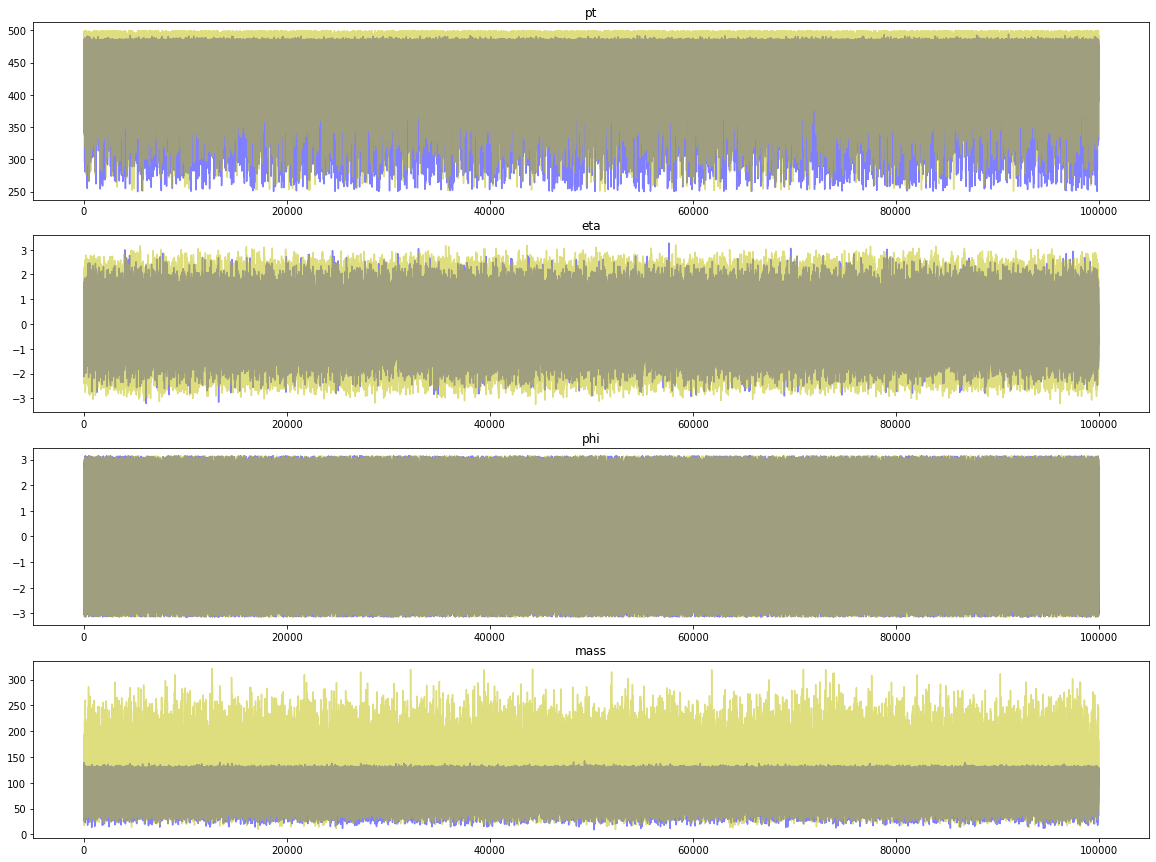

In [42]:
# The next few plots will compare the signal data with the background data. The signal will be
# represented by the blue, and background in yellow. Overlapping data is the grey. It is very
# beneficial to know what the background noise look like in each plot, as we can see that some
# signal data cannot be distinguished easily since it is completely embedded inside the
# background. Conversely, we can see that some plots have very apparent signals outside of the
# noise. Using the comparisons where signals standout, statistical analysis can help determine
# the sensitivity of the detector, how much noise to take out, etc. Having indexed wanted and
# unwanted data, we can apply these to comparisons that are indistringuishable and see if true
# signal can be extracted from the background.

plt.subplot(4,1,1)
plt.plot(signal1['pt'], color = 'b', alpha = 0.5)
plt.plot(background1['pt'], color = 'y', alpha = 0.5)
plt.title('pt')

plt.subplot(4,1,2)
plt.plot(signal1['eta'], color = 'b', alpha = 0.5)
plt.plot(background1['eta'], color = 'y', alpha = 0.5)
plt.title('eta')

plt.subplot(4,1,3)
plt.plot(signal1['phi'], color = 'b', alpha = 0.5)
plt.plot(background1['phi'], color = 'y', alpha = 0.5)
plt.title('phi')

plt.subplot(4,1,4)
plt.plot(signal1['mass'], color = 'b', alpha = 0.5)
plt.plot(background1['mass'], color = 'y', alpha = 0.5)
plt.title('mass')

plt.show()

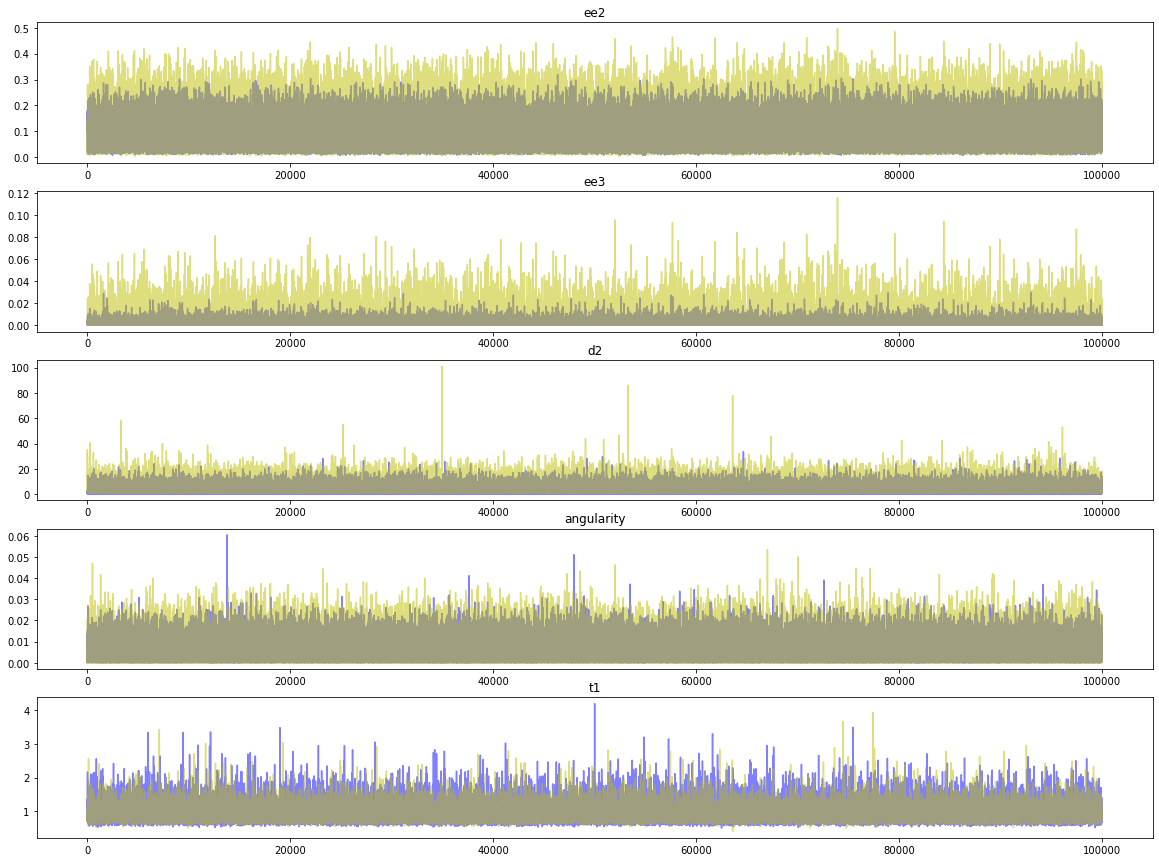

In [45]:
plt.subplot(5,1,1)
plt.plot(signal1['ee2'], color = 'b', alpha = 0.5)
plt.plot(background1['ee2'], color = 'y', alpha = 0.5)
plt.title('ee2')

plt.subplot(5,1,2)
plt.plot(signal1['ee3'], color = 'b', alpha = 0.5)
plt.plot(background1['ee3'], color = 'y', alpha = 0.5)
plt.title('ee3')

plt.subplot(5,1,3)
plt.plot(signal1['d2'], color = 'b', alpha = 0.5)
plt.plot(background1['d2'], color = 'y', alpha = 0.5)
plt.title('d2')

plt.subplot(5,1,4)
plt.plot(signal1['angularity'], color = 'b', alpha = 0.5)
plt.plot(background1['angularity'], color = 'y', alpha = 0.5)
plt.title('angularity')

plt.subplot(5,1,5)
plt.plot(signal1['t1'], color = 'b', alpha = 0.5)
plt.plot(background1['t1'], color = 'y', alpha = 0.5)
plt.title('t1')

plt.show()

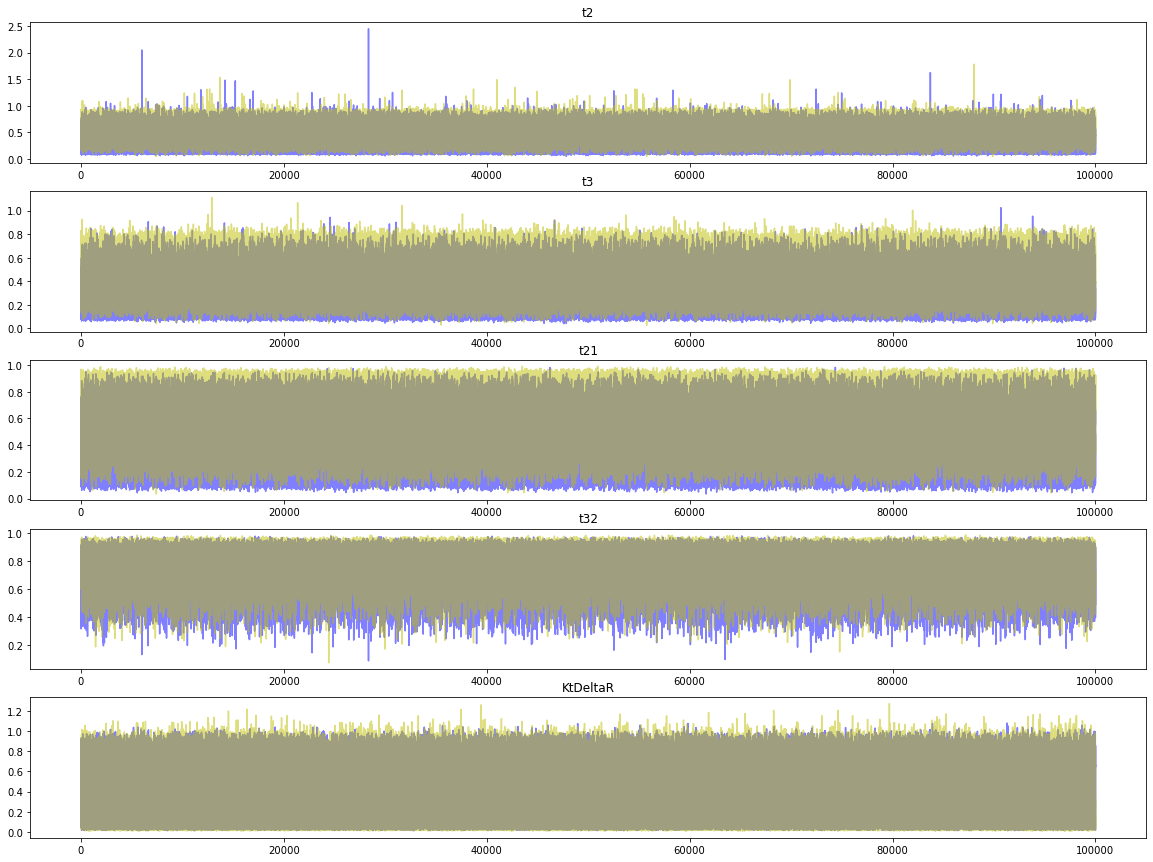

In [46]:
plt.subplot(5,1,1)
plt.plot(signal1['t2'], color = 'b', alpha = 0.5)
plt.plot(background1['t2'], color = 'y', alpha = 0.5)
plt.title('t2')

plt.subplot(5,1,2)
plt.plot(signal1['t3'], color = 'b', alpha = 0.5)
plt.plot(background1['t3'], color = 'y', alpha = 0.5)
plt.title('t3')

plt.subplot(5,1,3)
plt.plot(signal1['t21'], color = 'b', alpha = 0.5)
plt.plot(background1['t21'], color = 'y', alpha = 0.5)
plt.title('t21')

plt.subplot(5,1,4)
plt.plot(signal1['t32'], color = 'b', alpha = 0.5)
plt.plot(background1['t32'], color = 'y', alpha = 0.5)
plt.title('t32')

plt.subplot(5,1,5)
plt.plot(signal1['KtDeltaR'], color = 'b', alpha = 0.5)
plt.plot(background1['KtDeltaR'], color = 'y', alpha = 0.5)
plt.title('KtDeltaR')

plt.show()

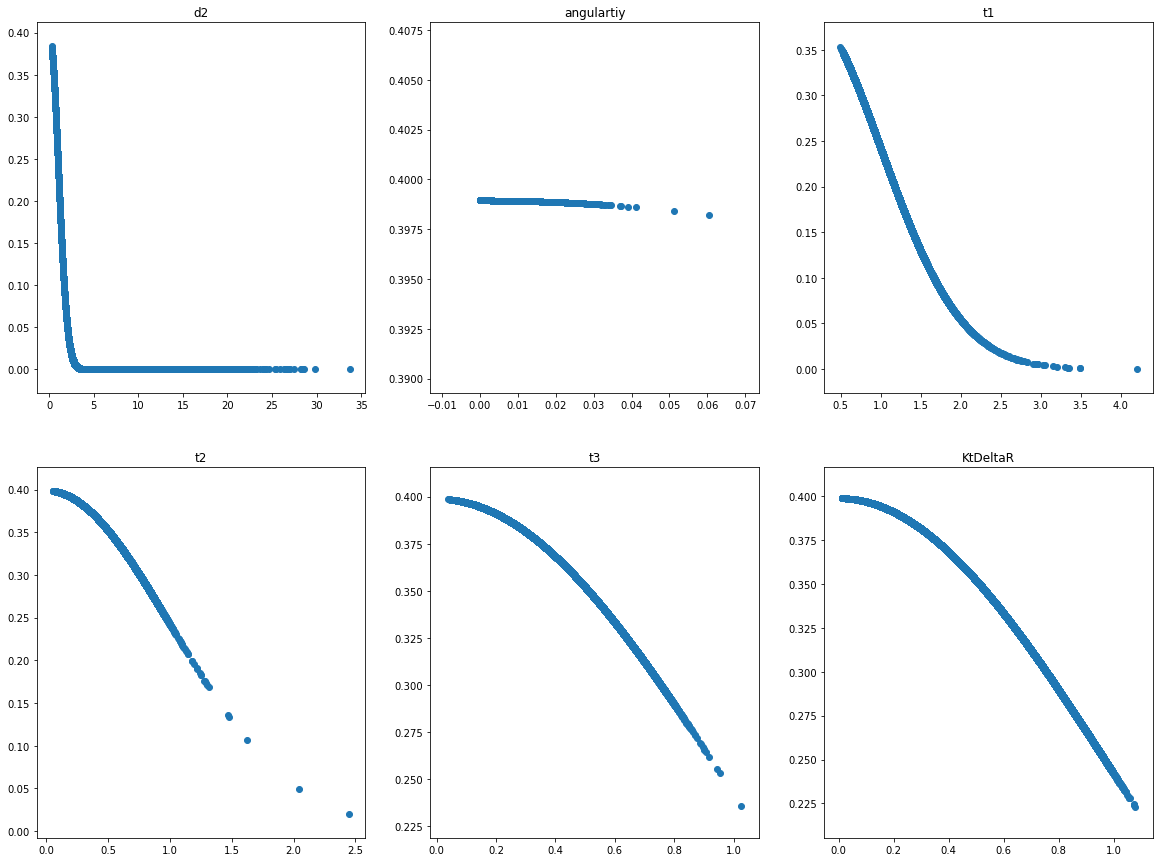

In [83]:
# Looking at the comparison plots above, I picked out the ones with signal that are visible above
# the background. t32 is a bit unique that the signal is displayed at lower value, with noise over
# the top, for ease of visualization, I didn't include in the following analysis. For the rest, a
# probability density function is made in order to see the frequency of the data. Data such as d2,
# t1, and t2, there is a tail, which means that there is a good amount of outliers in the distribution.
# Angularity data has a curve that is extremely partial and incomplete, meaning that all the values
# are very close together and very minimal variance. This can be observed from plots above, that
# with yellow omitted, the grey band is approximately uniformaly linear across with very few
# sticking out, and those that do, don't stick out much. The characteristic can be said for data
# like t3 and KtDeltaR, where there is not a lot of outlying signals of great amplitude.

plt.subplot(2,3,1)
plt.scatter(signal1['d2'],stats.norm.pdf(signal1['d2']), label = 'd2')
plt.title('d2')

plt.subplot(2,3,2)
plt.scatter(signal1['angularity'],stats.norm.pdf(signal1['angularity']), label = 'angularity')
plt.title('angulartiy')

plt.subplot(2,3,3)
plt.scatter(signal1['t1'],stats.norm.pdf(signal1['t1']), label = 't1')
plt.title('t1')

plt.subplot(2,3,4)
plt.scatter(signal1['t2'],stats.norm.pdf(signal1['t2']), label = 't2')
plt.title('t2')

plt.subplot(2,3,5)
plt.scatter(signal1['t3'],stats.norm.pdf(signal1['t3']), label = 't3')
plt.title('t3')

plt.subplot(2,3,6)
plt.scatter(signal1['KtDeltaR'],stats.norm.pdf(signal1['KtDeltaR']), label = 'KtDeltaR')
plt.title('KtDeltaR')

plt.show()

In [85]:
# The upper threshold is an arbituary limit of where we think the noise should stop, and out of the
# ordinary signals begin. The previous probability density function curves is a great visualization
# in addition to finding the standard deviation of each data. This standard deviation is the threshold
# value and we can see just about how much datapoints relative the the whole are above this limit.
# From the data, we can calculate the sigma at 5.1 and 5.8, and compare the observed and expected
# outcomes.

#prob5sigma = 1 / np.multiply(3.5, 10**6)

print(np.std(signal1['d2']) * 5.1)
print(np.std(signal1['angularity']) * 5.1)
print(np.std(signal1['t1']) * 5.1)
print(np.std(signal1['t2']) * 5.1)
print(np.std(signal1['t3']) * 5.1)
print(np.std(signal1['KtDeltaR']) * 5.1)

12.752919142402718
0.02187537129824092
1.1098828804706347
0.9812923321930666
0.7270630327532563
1.0519541701312607


In [86]:
print(np.std(signal1['d2']) * 5.8)
print(np.std(signal1['angularity']) * 5.8)
print(np.std(signal1['t1']) * 5.8)
print(np.std(signal1['t2']) * 5.8)
print(np.std(signal1['t3']) * 5.8)
print(np.std(signal1['KtDeltaR']) * 5.8)

14.503319809007014
0.024877873241136734
1.2622197464175846
1.1159795150430953
0.8268559980331152
1.196340036619865
